In [108]:
from pandas import read_csv
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


## Data Info

In [2]:
df = read_csv('/content/diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Data Preprocessing

In [6]:
df=df.drop_duplicates()

In [7]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
print(df[df['BloodPressure']==0].shape[0])
print(df[df['Glucose']==0].shape[0])
print(df[df['SkinThickness']==0].shape[0])
print(df[df['Insulin']==0].shape[0])
print(df[df['BMI']==0].shape[0])

35
5
227
374
11


In [109]:

df['Glucose']=df['Glucose'].replace(0,df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

In [110]:
sorted(df['Outcome'].unique())

[0, 1]

In [11]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

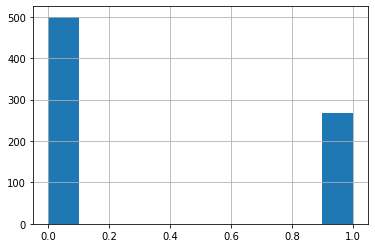

In [12]:
df['Outcome'].hist()

In [13]:
df.shape

(768, 9)

## X & Y Split

In [111]:
X = df.drop('Outcome',axis=1)
Y = df['Outcome']

In [112]:
X.shape,Y.shape

((768, 8), (768,))

In [113]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.3, random_state=7)

## Normalization

In [216]:
from sklearn import preprocessing
x = X_train.values #returns a numpy array
std_scaler = preprocessing.StandardScaler()
std_scaler.fit(x)
x_scaled_std = std_scaler.transform(x)
X_train_std = pd.DataFrame(x_scaled_std,columns=X_train.columns)

In [217]:
x = X_test.values
x_scaled_std = std_scaler.transform(x)
X_test_std = pd.DataFrame(x_scaled_std,columns=X_test.columns)

In [116]:
X_train_std.shape[1]

8

## MODEL

In [259]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
def build_model():
  model1 = Sequential()
  model1.add(Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
  model1.add(Dense(1, activation='linear'))
  return model1
model1 = build_model()

In [260]:
model1.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_76 (Dense)            (None, 30)                270       
                                                                 
 dense_77 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [261]:
# compile the model
model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [262]:
history = model1.fit(X_train, Y_train, epochs=30, batch_size=32, validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/30
12/12 - 1s - loss: 323.6505 - mae: 15.5191 - val_loss: 186.0639 - val_mae: 10.7978 - 536ms/epoch - 45ms/step
Epoch 2/30
12/12 - 0s - loss: 95.0983 - mae: 7.8309 - val_loss: 42.3851 - val_mae: 5.0643 - 49ms/epoch - 4ms/step
Epoch 3/30
12/12 - 0s - loss: 21.9573 - mae: 3.6752 - val_loss: 13.1604 - val_mae: 2.7788 - 36ms/epoch - 3ms/step
Epoch 4/30
12/12 - 0s - loss: 14.2342 - mae: 2.9067 - val_loss: 10.9074 - val_mae: 2.5551 - 37ms/epoch - 3ms/step
Epoch 5/30
12/12 - 0s - loss: 12.0138 - mae: 2.7441 - val_loss: 8.0416 - val_mae: 2.2046 - 57ms/epoch - 5ms/step
Epoch 6/30
12/12 - 0s - loss: 8.9596 - mae: 2.3611 - val_loss: 6.7662 - val_mae: 1.9829 - 40ms/epoch - 3ms/step
Epoch 7/30
12/12 - 0s - loss: 7.4083 - mae: 2.1366 - val_loss: 6.3552 - val_mae: 1.8750 - 56ms/epoch - 5ms/step
Epoch 8/30
12/12 - 0s - loss: 6.4631 - mae: 1.9987 - val_loss: 5.6735 - val_mae: 1.7671 - 38ms/epoch - 3ms/step
Epoch 9/30
12/12 - 0s - loss: 5.7258 - mae: 1.8818 - val_loss: 5.0799 - val_mae: 1.6639 -

In [263]:
loss, acc = model1.evaluate(X_test, Y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.966


In [264]:
Y_pred = model1.predict(X_test)
from sklearn.metrics import mean_squared_error
print(mean_squared_error(Y_test,Y_pred)**0.5)


1.2820866101580046


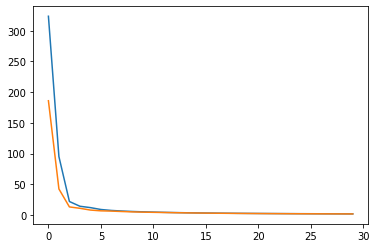

In [265]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

## Classification 
# Support Vector Machine Classifier

In [266]:
from sklearn.svm import SVC

In [267]:
clf_svc = SVC()
clf_svc.fit(X_train_std, Y_train) 
Y_pred_svc = clf_svc.predict(X_test_std)

In [268]:
clf_svc.score(X_test_std,Y_pred_svc)

1.0

# Para gride

In [269]:
param_grid = {'C': [20, 100, 1000],
              'gamma': [1, 0.1, 0.001, 0.0001],
              'kernel': ['rbf']}

In [270]:
from sklearn.model_selection import GridSearchCV 
CV_clf_svc = GridSearchCV(estimator=clf_svc, param_grid=param_grid,cv= 2, verbose=1)
CV_clf_svc.fit(X_train_std, Y_train)

Fitting 2 folds for each of 12 candidates, totalling 24 fits


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [20, 100, 1000], 'gamma': [1, 0.1, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=1)

In [271]:
print(CV_clf_svc.best_params_)
print(CV_clf_svc.cv_results_['mean_test_score'])
print(sum(CV_clf_svc.cv_results_['mean_test_score'])/ len(CV_clf_svc.cv_results_['mean_test_score']))

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
[0.67596959 0.72436609 0.76910059 0.67037952 0.67596959 0.72438689
 0.772825   0.77469761 0.67596959 0.66480331 0.7746768  0.76910059]
0.7226870988921563


In [272]:
CV_clf_svc.score(X_test_std,Y_pred_svc)

0.9090909090909091

In [273]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_svc)

0.21645021645021645

# Random forest Classifier

In [274]:
from sklearn.ensemble import RandomForestClassifier

In [275]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_std, Y_train) 
Y_pred_rf = clf_rf.predict(X_test_std)

In [276]:
clf_rf.score(X_test_std,Y_pred_rf)

1.0

## Para grid
it fine tunes

In [277]:
param_grid = { 
    'n_estimators': [50,100,10],
    'max_depth' : [600,800,786],
    'criterion' :['gini', 'entropy']
}

In [278]:
from sklearn.model_selection import GridSearchCV 
CV_clf_rf = GridSearchCV(estimator=clf_rf, param_grid=param_grid,cv= 2, verbose=1)
CV_clf_rf.fit(X_train_std, Y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [600, 800, 786],
                         'n_estimators': [50, 100, 10]},
             verbose=1)

In [279]:
print(CV_clf_rf.best_params_)
print(CV_clf_rf.cv_results_['mean_test_score'])
print(sum(CV_clf_rf.cv_results_['mean_test_score'])/ len(CV_clf_rf.cv_results_['mean_test_score']))

{'criterion': 'gini', 'max_depth': 600, 'n_estimators': 100}
[0.75232342 0.76534844 0.73186345 0.75420296 0.74672641 0.7262387
 0.74673334 0.7597653  0.73552544 0.76349664 0.75605476 0.70767908
 0.75416828 0.75978611 0.72629418 0.75419603 0.75790656 0.74678189]
0.7469494997133292


In [280]:
CV_clf_rf.score(X_test_std,Y_pred_rf)

0.9307359307359307

In [281]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_rf)

0.22510822510822512

# KNN ( K nearest neighbours)

In [282]:
 from sklearn.neighbors import KNeighborsClassifier
 

In [283]:
clf_knn = KNeighborsClassifier(n_neighbors=3)
clf_knn.fit(X_train_std, Y_train) 
Y_pred_knn = clf_knn.predict(X_test_std)

In [284]:
clf_knn.score(X_test_std,Y_pred_knn)

1.0

## para gride

In [285]:
param_grid = {'weights' : ['uniform', 'distance'],
              'leaf_size' : [30,50,100],
              'n_neighbors' : [ 1,5,10]}

In [286]:
from sklearn.model_selection import GridSearchCV 
CV_clf_knn = GridSearchCV(estimator=clf_knn, param_grid=param_grid,cv= 2, verbose=1)
CV_clf_knn.fit(X_train_std, Y_train)

Fitting 2 folds for each of 18 candidates, totalling 36 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'leaf_size': [30, 50, 100], 'n_neighbors': [1, 5, 10],
                         'weights': ['uniform', 'distance']},
             verbose=1)

In [287]:
print(CV_clf_knn.best_params_)
print(CV_clf_knn.cv_results_['mean_test_score'])
print(sum(CV_clf_knn.cv_results_['mean_test_score'])/ len(CV_clf_knn.cv_results_['mean_test_score']))

{'leaf_size': 30, 'n_neighbors': 10, 'weights': 'uniform'}
[0.69083948 0.69083948 0.72809743 0.73182877 0.73740498 0.73555318
 0.69083948 0.69083948 0.72809743 0.73182877 0.73740498 0.73555318
 0.69083948 0.69083948 0.72809743 0.73182877 0.73740498 0.73555318]
0.7190938892896114


In [288]:
CV_clf_knn.score(X_test_std,Y_pred_knn)

0.8484848484848485

In [328]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_knn)

0.29004329004329005

# Logistic regression

In [290]:
from sklearn.linear_model import LogisticRegression

In [291]:
 clf_lr= LogisticRegression(random_state=0)
 clf_lr.fit(X_train_std, Y_train)
 Y_pred_lr = clf_lr.predict(X_test_std) 

In [292]:
clf_lr.score(X_test_std,Y_pred_lr)

1.0

## Para grid

In [323]:
param_grid = {'random_state': [10,3,9,2],
              'intercept_scaling': [1.0,0.1,0.01,100],
              'solver' :['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              'penalty': ['l2', 'none']}

In [324]:
from sklearn.model_selection import GridSearchCV 
CV_clf_lr = GridSearchCV(estimator=clf_lr, param_grid=param_grid,cv= 2, verbose=1)
CV_clf_lr.fit(X_train_std, Y_train)

Fitting 2 folds for each of 160 candidates, totalling 320 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
32 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
32 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 464, in _check_solver
    raise ValueError("penalty='none' is n

GridSearchCV(cv=2, estimator=LogisticRegression(random_state=0),
             param_grid={'intercept_scaling': [1.0, 0.1, 0.01, 100],
                         'penalty': ['l2', 'none'],
                         'random_state': [10, 3, 9, 2],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             verbose=1)

In [325]:
print(CV_clf_lr.best_params_)
print(CV_clf_lr.cv_results_['mean_test_score'])
print(sum(CV_clf_lr.cv_results_['mean_test_score'])/ len(CV_clf_lr.cv_results_['mean_test_score']))

{'intercept_scaling': 1.0, 'penalty': 'l2', 'random_state': 10, 'solver': 'liblinear'}
[0.77098014 0.77098014 0.77283887 0.77098014 0.77098014 0.77098014
 0.77098014 0.77283887 0.77098014 0.77098014 0.77098014 0.77098014
 0.77283887 0.77098014 0.77098014 0.77098014 0.77098014 0.77283887
 0.77098014 0.77098014 0.77098014 0.77098014        nan 0.77098014
 0.77098014 0.77098014 0.77098014        nan 0.77098014 0.77098014
 0.77098014 0.77098014        nan 0.77098014 0.77098014 0.77098014
 0.77098014        nan 0.77098014 0.77098014 0.77098014 0.77098014
 0.75234423 0.77098014 0.77098014 0.77098014 0.77098014 0.75234423
 0.77098014 0.77098014 0.77098014 0.77098014 0.75234423 0.77098014
 0.77098014 0.77098014 0.77098014 0.75234423 0.77098014 0.77098014
 0.77098014 0.77098014        nan 0.77098014 0.77098014 0.77098014
 0.77098014        nan 0.77098014 0.77098014 0.77098014 0.77098014
        nan 0.77098014 0.77098014 0.77098014 0.77098014        nan
 0.77098014 0.77098014 0.77098014 0.770980

In [326]:
CV_clf_lr.score(X_test_std,Y_pred_lr)

0.9956709956709957

In [327]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred_lr)

0.23376623376623376